# **CBAM-UNet Accuracy**

In [20]:
import numpy as np
import rasterio
import os

# Folder paths
ground_truth_folder = r"D:/Kuliah/Magister/Tesis/Percobaan/Hitung Akurasi/CBAM/gt"
predicted_folder = r"D:/Kuliah/Magister/Tesis/Percobaan/Hitung Akurasi/CBAM/fix"

# Function read TIFF
def read_tiff(filepath):
    """Reads a TIFF file and returns it as a NumPy array."""
    with rasterio.open(filepath) as src:
        return src.read(1)

# Function compute metrics
def calculate_metrics(ground_truth, predicted_mask):
    ground_truth = ground_truth.ravel()
    predicted_mask = predicted_mask.ravel()

    TP = np.sum((ground_truth == 1) & (predicted_mask == 1))
    FP = np.sum((ground_truth == 0) & (predicted_mask == 1))
    FN = np.sum((ground_truth == 1) & (predicted_mask == 0))
    TN = np.sum((ground_truth == 0) & (predicted_mask == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    overall_accuracy = (TP + TN) / (TP + FP + FN + TN)

    return TP, FP, FN, TN, precision, recall, f1_score, iou, overall_accuracy


# Load first 5 TIFF pairs
gt_files = sorted([os.path.join(ground_truth_folder, f) 
                   for f in os.listdir(ground_truth_folder) if f.endswith(".tif")])[:5]

pred_files = sorted([os.path.join(predicted_folder, f) 
                     for f in os.listdir(predicted_folder) if f.endswith(".tif")])[:5]

if len(gt_files) != len(pred_files):
    raise ValueError("Jumlah Ground Truth dan Predicted Masks tidak sama!")

# Evaluation loop
print("\n=== Evaluation Results per Image ===\n")

results = []

for i, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files)):
    gt = read_tiff(gt_path)
    pred = read_tiff(pred_path)

    TP, FP, FN, TN, precision, recall, f1, iou, acc = calculate_metrics(gt, pred)
    results.append([TP, FP, FN, TN, precision, recall, f1, iou, acc])

    print(f"Image {i+1}:")
    print(f" TP: {TP}  |  FP: {FP}  |  FN: {FN}  |  TN: {TN}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-score: {f1:.4f}")
    print(f" IoU: {iou:.4f}")
    print(f" Accuracy: {acc:.4f}\n")


# Mean metrics
results = np.array(results)
avg = np.mean(results[:,4:], axis=0)

print("=== AVERAGE METRICS (Across 5 Images) ===")
print(f"Mean Precision: {avg[0]:.4f}")
print(f"Mean Recall: {avg[1]:.4f}")
print(f"Mean F1-score: {avg[2]:.4f}")
print(f"Mean IoU: {avg[3]:.4f}")
print(f"Mean Accuracy: {avg[4]:.4f}")



=== Evaluation Results per Image ===

Image 1:
 TP: 96699  |  FP: 11785  |  FN: 3262  |  TN: 150398
 Precision: 0.8914
 Recall: 0.9674
 F1-score: 0.9278
 IoU: 0.8653
 Accuracy: 0.9426

Image 2:
 TP: 146116  |  FP: 16790  |  FN: 11327  |  TN: 87911
 Precision: 0.8969
 Recall: 0.9281
 F1-score: 0.9122
 IoU: 0.8386
 Accuracy: 0.8927

Image 3:
 TP: 109552  |  FP: 12442  |  FN: 4340  |  TN: 135810
 Precision: 0.8980
 Recall: 0.9619
 F1-score: 0.9289
 IoU: 0.8672
 Accuracy: 0.9360

Image 4:
 TP: 160728  |  FP: 24513  |  FN: 5715  |  TN: 71188
 Precision: 0.8677
 Recall: 0.9657
 F1-score: 0.9140
 IoU: 0.8417
 Accuracy: 0.8847

Image 5:
 TP: 118638  |  FP: 14665  |  FN: 5283  |  TN: 123558
 Precision: 0.8900
 Recall: 0.9574
 F1-score: 0.9224
 IoU: 0.8561
 Accuracy: 0.9239

=== AVERAGE METRICS (Across 5 Images) ===
Mean Precision: 0.8888
Mean Recall: 0.9561
Mean F1-score: 0.9211
Mean IoU: 0.8538
Mean Accuracy: 0.9160



 TP/FP/FN/TN Visualization of CBAM-UNet


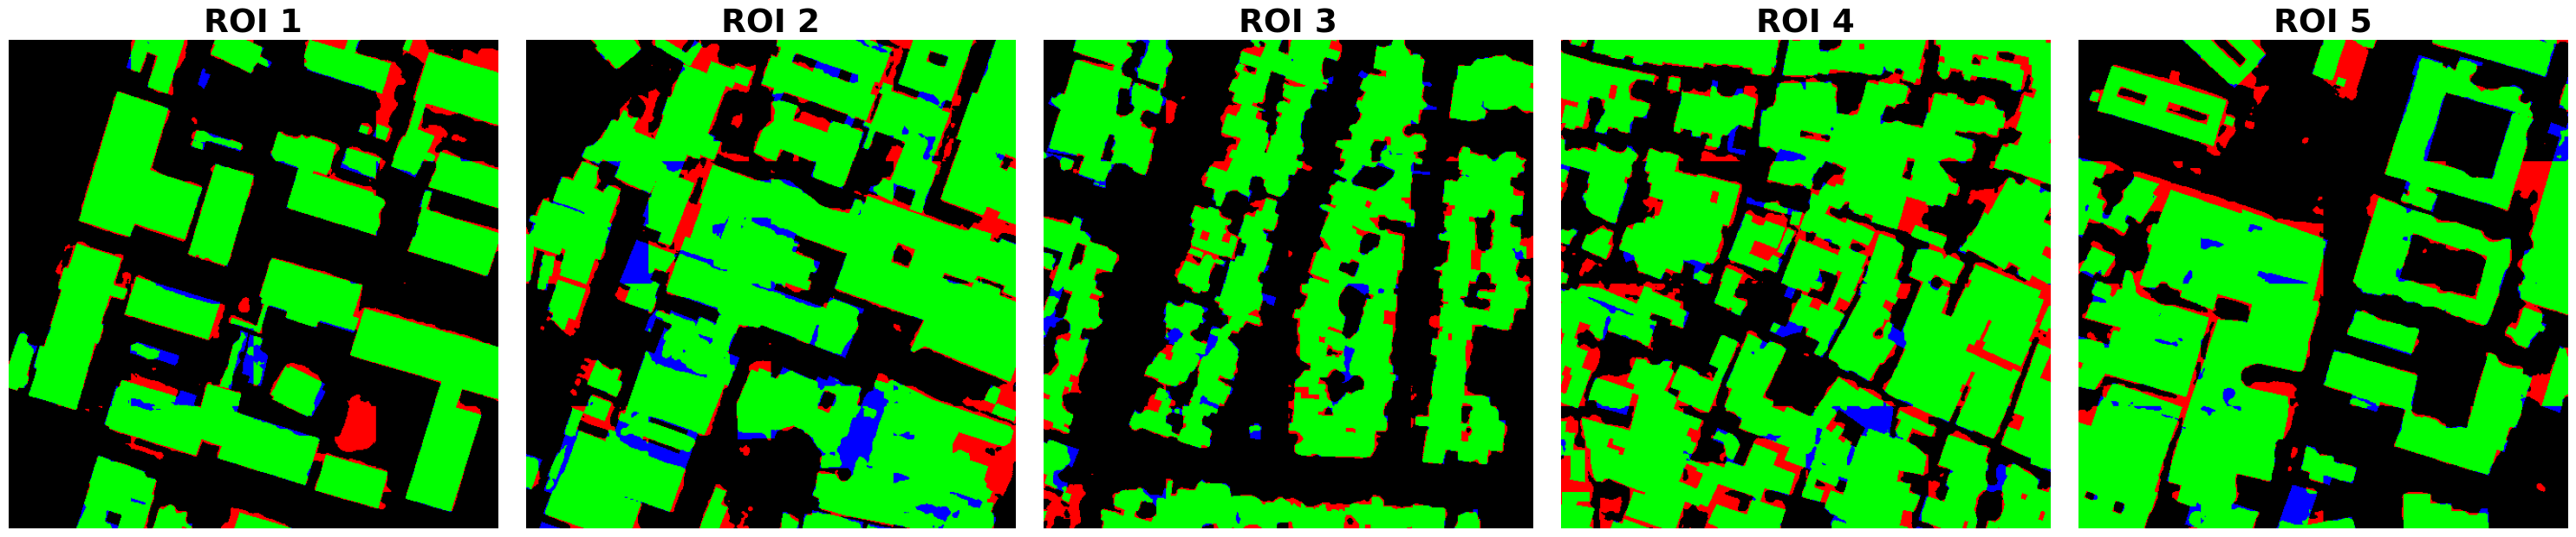

In [21]:
# Confusion Map Plot
print("\n TP/FP/FN/TN Visualization of CBAM-UNet")

fig, axes = plt.subplots(1, len(gt_files), figsize=(6 * len(gt_files), 6))

if len(gt_files) == 1:
    axes = [axes]  # Fix in case only one image exists

for idx, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files)):
    gt = read_tiff(gt_path)
    pred = read_tiff(pred_path)

    # Create confusion pixel map
    confusion_map = np.zeros((*gt.shape, 3), dtype=np.uint8)

    confusion_map[(gt == 1) & (pred == 1)] = [0, 255, 0]     # TP = Green
    confusion_map[(gt == 0) & (pred == 1)] = [255, 0, 0]     # FP = Red
    confusion_map[(gt == 1) & (pred == 0)] = [0, 0, 255]     # FN = Blue
    confusion_map[(gt == 0) & (pred == 0)] = [0, 0, 0]       # TN = Black

    axes[idx].imshow(confusion_map)
    axes[idx].set_title(f"ROI {idx+1}", fontsize=27, fontweight="bold")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()


# **Basic U-Net Accuracy**

In [22]:
import numpy as np
import rasterio
import os

# Folder paths
ground_truth_folder = r"D:/Kuliah/Magister/Tesis/Percobaan/Hitung Akurasi/Basic/gt"
predicted_folder = r"D:/Kuliah/Magister/Tesis/Percobaan/Hitung Akurasi/Basic/fix"

# Function read TIFF
def read_tiff(filepath):
    """Reads a TIFF file and returns it as a NumPy array."""
    with rasterio.open(filepath) as src:
        return src.read(1)

# Function compute metrics
def calculate_metrics(ground_truth, predicted_mask):
    ground_truth = ground_truth.ravel()
    predicted_mask = predicted_mask.ravel()

    TP = np.sum((ground_truth == 1) & (predicted_mask == 1))
    FP = np.sum((ground_truth == 0) & (predicted_mask == 1))
    FN = np.sum((ground_truth == 1) & (predicted_mask == 0))
    TN = np.sum((ground_truth == 0) & (predicted_mask == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    iou = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    overall_accuracy = (TP + TN) / (TP + FP + FN + TN)

    return TP, FP, FN, TN, precision, recall, f1_score, iou, overall_accuracy


# Load first 5 TIFF pairs
gt_files = sorted([os.path.join(ground_truth_folder, f) 
                   for f in os.listdir(ground_truth_folder) if f.endswith(".tif")])[:5]

pred_files = sorted([os.path.join(predicted_folder, f) 
                     for f in os.listdir(predicted_folder) if f.endswith(".tif")])[:5]

if len(gt_files) != len(pred_files):
    raise ValueError("Jumlah Ground Truth dan Predicted Masks tidak sama!")

# Evaluation loop
print("\n=== Evaluation Results per Image ===\n")

results = []

for i, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files)):
    gt = read_tiff(gt_path)
    pred = read_tiff(pred_path)

    TP, FP, FN, TN, precision, recall, f1, iou, acc = calculate_metrics(gt, pred)
    results.append([TP, FP, FN, TN, precision, recall, f1, iou, acc])

    print(f"Image {i+1}:")
    print(f" TP: {TP}  |  FP: {FP}  |  FN: {FN}  |  TN: {TN}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-score: {f1:.4f}")
    print(f" IoU: {iou:.4f}")
    print(f" Accuracy: {acc:.4f}\n")


# Mean metrics
results = np.array(results)
avg = np.mean(results[:,4:], axis=0)

print("=== AVERAGE METRICS (Across 5 Images) ===")
print(f"Mean Precision: {avg[0]:.4f}")
print(f"Mean Recall: {avg[1]:.4f}")
print(f"Mean F1-score: {avg[2]:.4f}")
print(f"Mean IoU: {avg[3]:.4f}")
print(f"Mean Accuracy: {avg[4]:.4f}")



=== Evaluation Results per Image ===

Image 1:
 TP: 99383  |  FP: 22620  |  FN: 578  |  TN: 139563
 Precision: 0.8146
 Recall: 0.9942
 F1-score: 0.8955
 IoU: 0.8108
 Accuracy: 0.9115

Image 2:
 TP: 154551  |  FP: 33962  |  FN: 2892  |  TN: 70739
 Precision: 0.8198
 Recall: 0.9816
 F1-score: 0.8935
 IoU: 0.8075
 Accuracy: 0.8594

Image 3:
 TP: 112333  |  FP: 21631  |  FN: 1559  |  TN: 126621
 Precision: 0.8385
 Recall: 0.9863
 F1-score: 0.9064
 IoU: 0.8289
 Accuracy: 0.9115

Image 4:
 TP: 165136  |  FP: 42215  |  FN: 1307  |  TN: 53486
 Precision: 0.7964
 Recall: 0.9921
 F1-score: 0.8836
 IoU: 0.7914
 Accuracy: 0.8340

Image 5:
 TP: 120786  |  FP: 25581  |  FN: 3135  |  TN: 112642
 Precision: 0.8252
 Recall: 0.9747
 F1-score: 0.8938
 IoU: 0.8079
 Accuracy: 0.8905

=== AVERAGE METRICS (Across 5 Images) ===
Mean Precision: 0.8189
Mean Recall: 0.9858
Mean F1-score: 0.8945
Mean IoU: 0.8093
Mean Accuracy: 0.8814



 TP/FP/FN/TN Visualization of Basic U-Net


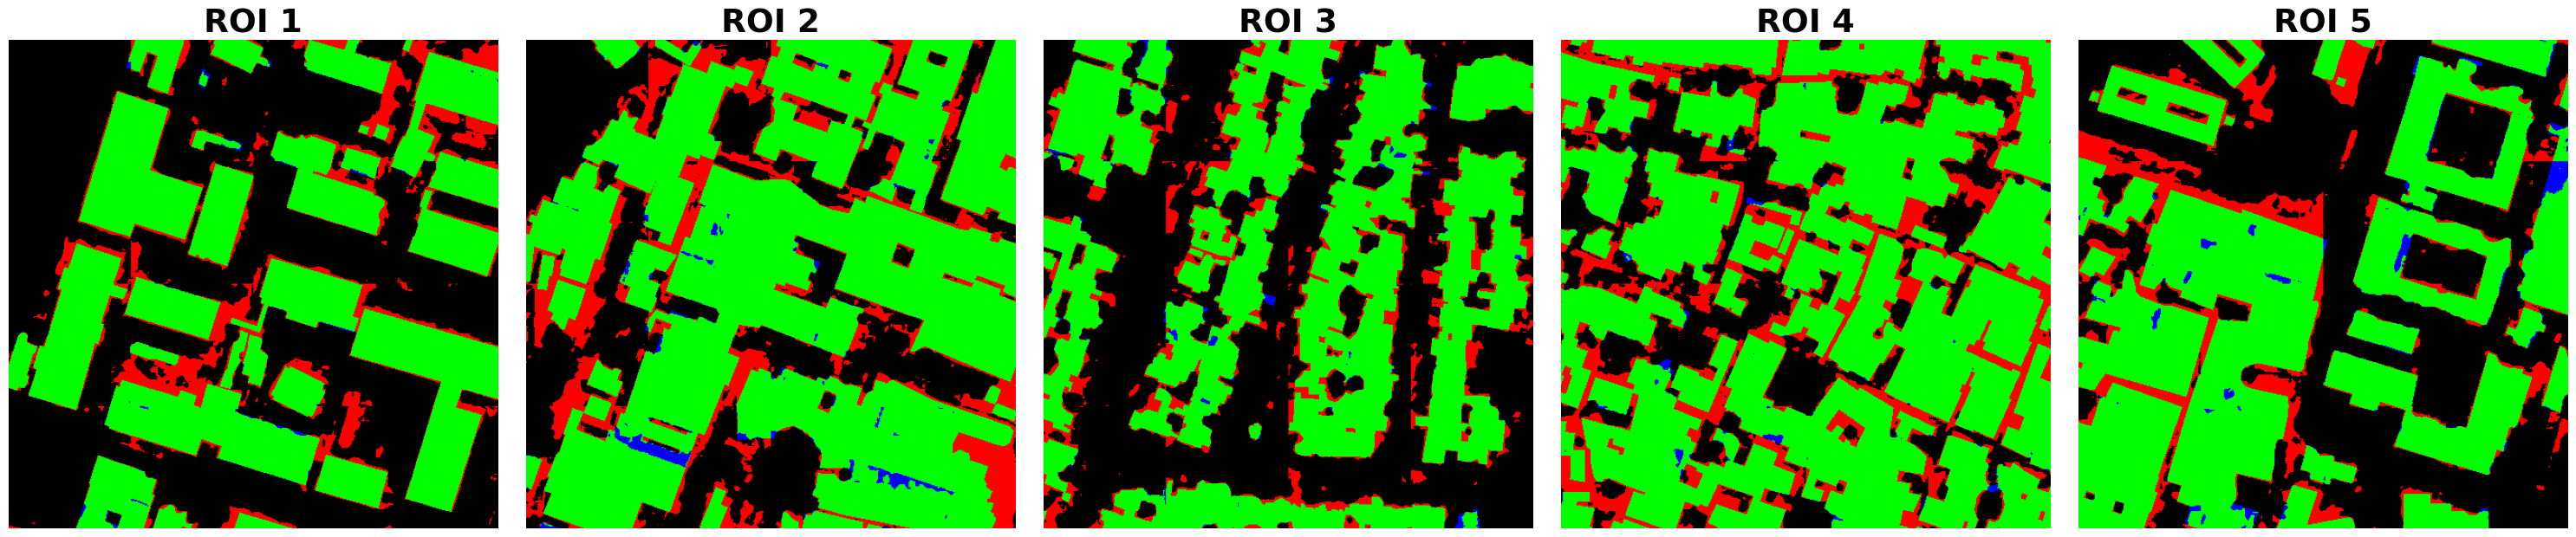

In [23]:
# Confusion Map Plot ===
print("\n TP/FP/FN/TN Visualization of Basic U-Net")

fig, axes = plt.subplots(1, len(gt_files), figsize=(6 * len(gt_files), 6))

if len(gt_files) == 1:
    axes = [axes]  # Fix in case only one image exists

for idx, (gt_path, pred_path) in enumerate(zip(gt_files, pred_files)):
    gt = read_tiff(gt_path)
    pred = read_tiff(pred_path)

    # Create confusion pixel map
    confusion_map = np.zeros((*gt.shape, 3), dtype=np.uint8)

    confusion_map[(gt == 1) & (pred == 1)] = [0, 255, 0]     # TP = Green
    confusion_map[(gt == 0) & (pred == 1)] = [255, 0, 0]     # FP = Red
    confusion_map[(gt == 1) & (pred == 0)] = [0, 0, 255]     # FN = Blue
    confusion_map[(gt == 0) & (pred == 0)] = [0, 0, 0]       # TN = Black

    axes[idx].imshow(confusion_map)
    axes[idx].set_title(f"ROI {idx+1}", fontsize=27, fontweight="bold")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()
